# TUT 2: Implementing My Own Kernel


Description: sklearn package allows us to implement our own kernel and this will be an example of how we do it.

### Problem: Classification and Geometric Seperation.

We are given a fixed but unknown shape $S\subseteq \mathbb{R}^2$. 
We can take finite amount of measurements to get a data set $X = \{x_1,x_2,...,x_k\}$ and corresponding $\{\lambda_1,...,\lambda_k\}\subseteq \{\pm 1\}$ where if $\lambda_i = 1$ then $x_i \in S$ and if $\lambda_i=-1$ then $x\not\in S$. 

We let $X_+,X_-$ denote the partision of $X$ where $X_+$ is the set of outs and $X_-$ is the set of ins. 

Our ${\bf goal}$ is to find a function
$g:X\rightarrow \mathbb{R}$ such that $S = \{x\in \mathbb{R}^2: g(x)<0\}$. That is if we get new points in $X$ we can test of they are in $S$ by saying if $f(x)>0$ then they are, otherwise they are not.


Next we want to find the "best" space to pull our predictors $f:X\rightarrow \mathbb{R}$. We will focus on RKHS spaces $H(K)$.

So our problem is to find the "best" $f\in H(K)$ such that such that $sign(f)$ is positive on the $X_+$ points and negative on the $X_-$ points. But because we are in an RKHS we know that a function can be expressed by $f(x) = <f,k_x>_H$. The problem turns into finding a hyper plane a
hyperplane in $H(K)$ induced by a vector $H = \{g\in H(k): <f,g> = 0\}$. And recall that a hyperplane partitions the space $H(K)$ into three parts. That is $\{g\in H(k): <f,g> = 0\}$, $\{g\in H(k): <f,g> > 0\}$, and $\{g\in H(k): <f,g> < 0\}$.

${\bf Our\,\ Setup\,\ For \,\ Future}$:

Our approach will be slightly different. We have a RKHS that we know a lot about, namely the Hardy space $H^2$. We consider the 
Szego Kernel $K(z,w) = \frac{1}{1-\overline{w}z}$ which is the reproducing kernel for $H^2$. And $X$ is the open unit ball in the complex plain. The Szego kernel induces a feature map $\phi:X\rightarrow H(K) $ by $y\mapsto K(.,y) = k_y \in H^2$. Here some care must be taken because hyperplanes in complex vector spaces seperate the space into 4 parts. See (ComplexSVM_s.pdf in oneDrive)



### Example 1: Implementing My Own Kernel Using Sklearn

1. All real-valued RKHS's
2. Data $X\subseteq \mathbb{R}^2$.
3. Feature map: $\phi:\mathbb{R}^2\rightarrow \mathbb{R}^5$ given by $(x,y)\rightarrow (1,x,y,x^2,y^2)$
4. Kernel: $K:X\times X\rightarrow \R$ by $K(x,y) = <\phi(x),\phi(y)>$

In [1]:
# Packages:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,svm

from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# Importing Data

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
Y = iris.target

In [3]:
X.shape # Shows us that X is a 150x2 matrix. Each row in X represents a point in $R^2$

(150, 2)

In [4]:
# Defining a Feature Maps:
# Input: Element in R^2
# Output: Element in R^5
# See Pualson page 120 for description
def feature_map(x):
    output = np.array( [1,x[0],x[1],np.square(x[0]),np.square(x[1])])
    return output

In [5]:
def linear_kernel(x_i, x_j):
    return x_i.dot(x_j.T)

In [6]:
# This is where the learning occurs
# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=linear_kernel).fit(X, Y)


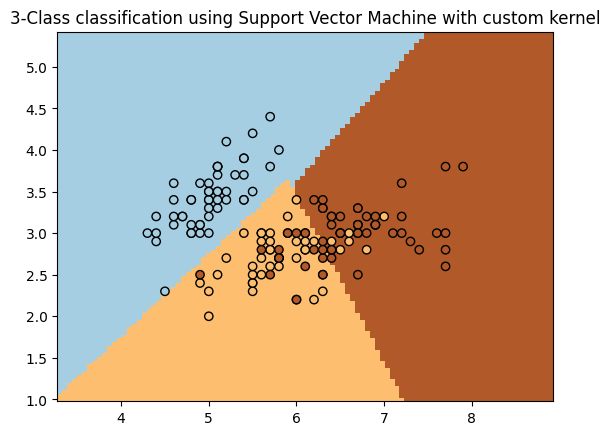

In [7]:

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()

150